In [ ]:
from google.colab import files
Files=files.upload()

Saving Data_FlatPricing.xlsx - SLR.xlsx to Data_FlatPricing.xlsx - SLR.xlsx


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
Data = pd.read_excel('Data_FlatPricing.xlsx - SLR.xlsx')

In [ ]:
Data

,Area,BHK,Price,City
0,1200,2,25,Delhi
1,1300,2,30,Mumbai
2,1350,3,38,Kolkata
3,1800,3,51,Hyderabad
4,1500,2,35,Delhi
5,1400,3,39,Kolkata
6,1000,2,18,Mumbai
7,2050,4,65,Hyderabad
8,2000,3,55,Delhi
9,2400,3,60,Kolkata


In [ ]:
Data=Data.dropna()

In [ ]:
data=Data.drop_duplicates()

In [ ]:
Data=Data.reset_index()

In [ ]:
import numpy as np
Q1 = np.percentile(Data["Price"], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(Data["Price"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UpperLimit=Q3 + 1.5*IQR
LowerLimit=Q1 - 1.5*IQR

<ipython-input-29-262e7510e135>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Data["Price"], 25,
<ipython-input-29-262e7510e135>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Data["Price"], 75,


In [ ]:
OutlierList=[]
for i in range (Data["Price"].shape[0]):
  if Data["Price"][i]>=UpperLimit:
    OutlierList.append(i)
  elif Data["Price"][i]<=LowerLimit:
    OutlierList.append(i)
print(OutlierList)

[]


In [ ]:
Data=Data.drop(OutlierList)

In [ ]:
Data=pd.get_dummies(Data, columns=['City'], drop_first=True)

In [ ]:
Data

,index,Area,BHK,Price,City_Hyderabad,City_Kolkata,City_Mumbai
0,0,1200,2,25,0,0,0
1,1,1300,2,30,0,0,1
2,2,1350,3,38,0,1,0
3,3,1800,3,51,1,0,0
4,4,1500,2,35,0,0,0
5,5,1400,3,39,0,1,0
6,6,1000,2,18,0,0,1
7,7,2050,4,65,1,0,0
8,8,2000,3,55,0,0,0
9,9,2400,3,60,0,1,0


In [ ]:
Data.columns

Index(['index', 'Area', 'BHK', 'Price', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai'],
      dtype='object')

In [ ]:
Y=Data ['Price']
X=Data[['Area', 'BHK']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
import statsmodels.api as sm
MLR=sm.OLS(Y_train,X_train).fit()
print (MLR.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2778.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                    3.82e-23
Time:                        06:37:28   Log-Likelihood:                         -54.001
No. Observations:                  20   AIC:                                      112.0
Df Residuals:                      18   BIC:                                      114.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
Y_pred=MLR.predict(X_test)

In [ ]:
Y_pred

8     53.931529
16    72.574300
0     32.847225
24    35.288759
11    63.364103
9     63.252915
dtype: float64

In [ ]:
Residual = Y_test - Y_pred

In [ ]:
import matplotlib.pylab as plt

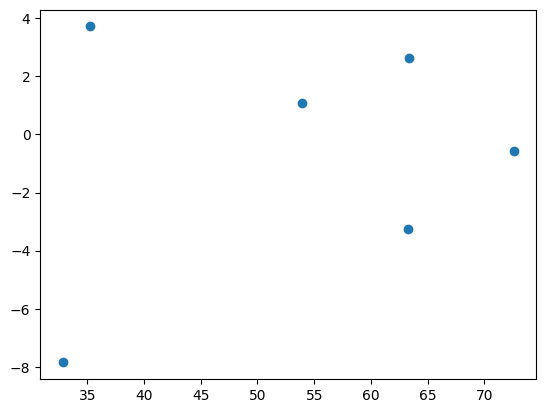

In [ ]:
plt.scatter(Y_pred,Residual)

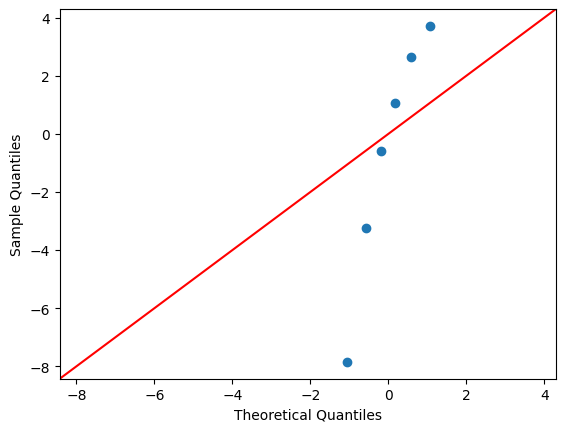

In [ ]:
import numpy as np

import pylab as py

# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code
# the graph look different than shown below.


sm.qqplot(Residual, line ='45')
py.show()


In [ ]:
X=Data[['Area', 'BHK', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai']]

In [ ]:
X.corr()

,Area,BHK,City_Hyderabad,City_Kolkata,City_Mumbai
Area,1.000000,0.634914,0.357881,-0.127891,-0.025684
BHK,0.634914,1.000000,0.301458,0.036152,0.113517
City_Hyderabad,0.357881,0.301458,1.000000,-0.284268,-0.365148
City_Kolkata,-0.127891,0.036152,-0.284268,1.000000,-0.233550
City_Mumbai,-0.025684,0.113517,-0.365148,-0.233550,1.000000
